#### Load Important Librarier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [3]:
data = pd.read_excel("death_population_final_combined.xlsx")
data.head(10)

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0
5,2006,Afghanistan,382.0,185.0,0.0,0.0,AFG,25442944.0
6,2007,Afghanistan,296.0,20.0,0.0,0.0,AFG,25903301.0
7,2008,Afghanistan,1334.0,182.0,0.0,0.0,AFG,26427199.0
8,2009,Afghanistan,101.0,86.0,20000.0,27282.0,AFG,27385307.0
9,2010,Afghanistan,350.0,200.0,0.0,0.0,AFG,28189672.0


In [4]:
data['country'].unique()

array(['Afghanistan', 'Niger', 'Indonesia', 'Peru', 'France', 'India',
       'Somalia', 'Brazil', 'China', 'Colombia', 'Sri Lanka', 'Pakistan',
       'Italy', 'Canada', 'Nigeria', 'Japan', 'Bangladesh', 'Nepal',
       'Kenya', 'United States', 'Australia', 'Vietnam', 'Argentina',
       'Haiti', 'Algeria', 'Philippines', 'Congo, Dem. Rep.', 'Guatemala',
       'Mozambique', 'Iran, Islamic Rep.', 'Mexico', 'Romania',
       'Thailand', 'Sudan', 'Turkiye', 'Albania', 'Tajikistan',
       'Honduras', 'Madagascar', 'Bolivia', 'Spain', 'South Africa',
       'Panama', 'Tanzania', 'Russian Federation', 'Uganda', 'Germany',
       'Angola', 'Dominican Republic', 'Korea, Rep.', 'Malaysia',
       'Malawi', 'Poland', 'Ethiopia', 'Greece', 'Chile', 'Myanmar',
       'New Zealand', 'Costa Rica', 'Papua New Guinea', 'Cambodia',
       'Guinea', 'Mali', 'Nicaragua', 'Paraguay', 'Rwanda', 'Switzerland',
       'United Kingdom', 'Yemen, Rep.', 'Zambia', 'Zimbabwe', 'Burundi',
       'Cuba', 'Ghana

In [5]:
# Filter the data for Afghanistan
selected_country = 'Afghanistan'
country = data[data['country'] == selected_country]

# Calculate the mortality rate
country['mortality_rate'] = (country['total_deaths'] / country['population']) * 1e6
country.tail()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population,mortality_rate
18,2019,Afghanistan,211.0,17.0,0.0,0.0,AFG,37769499.0,5.586518
19,2020,Afghanistan,328.0,251.0,0.0,0.0,AFG,38972230.0,8.416249
20,2021,Afghanistan,396.0,33.0,0.0,0.0,AFG,40099462.0,9.875444
21,2022,Afghanistan,1335.0,3312.0,0.0,0.0,AFG,41128771.0,32.459030
22,2023,Afghanistan,156.0,245.0,0.0,0.0,AFG,42239854.0,3.693195


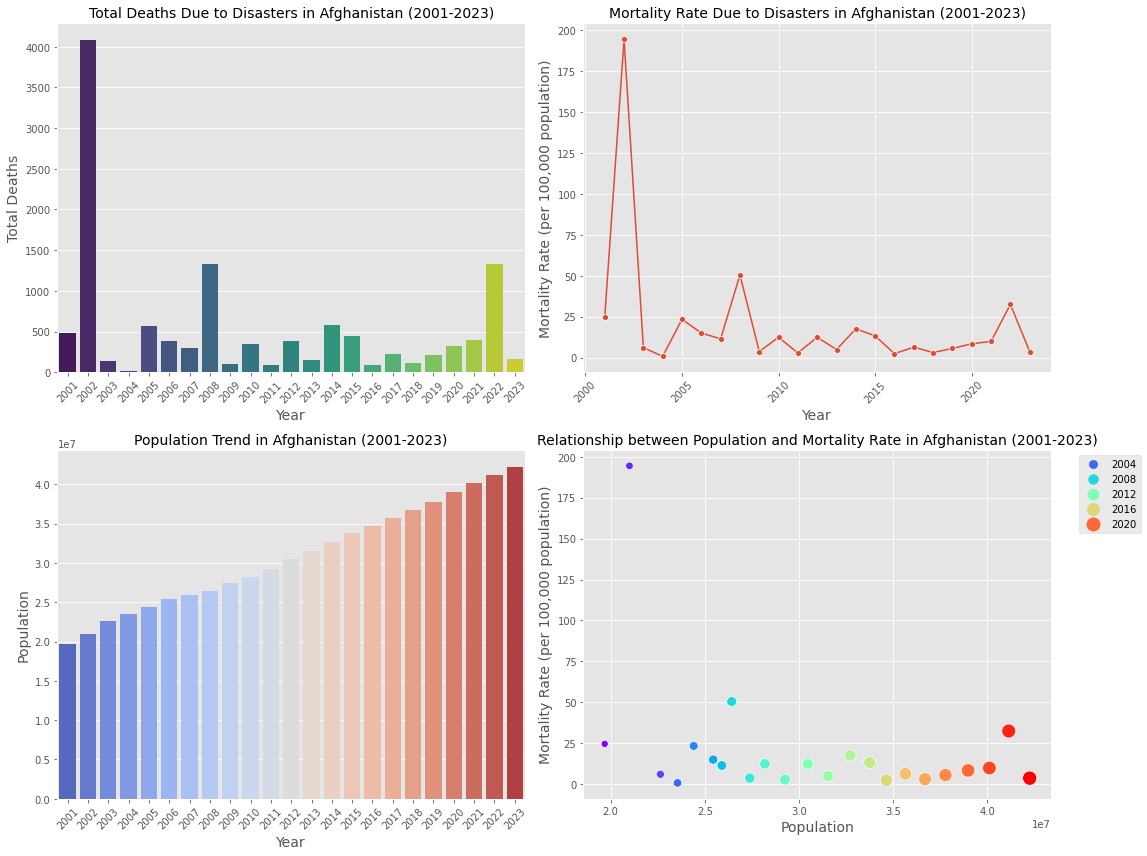

In [6]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=country, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=country, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=country, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=country, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [7]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = country[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')

In [8]:
prophet_data

,ds,y
0,2001-12-31,24.633504
1,2002-12-31,194.426201
2,2003-12-31,6.049866
3,2004-12-31,0.764216
4,2005-12-31,23.349946
5,2006-12-31,15.013986
6,2007-12-31,11.427115
7,2008-12-31,50.478297
8,2009-12-31,3.688109
9,2010-12-31,12.415895


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

In [9]:
# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2002-12-31','2008-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.3,
    seasonality_prior_scale=60,
    #holidays_prior_scale=10,
    mcmc_samples=0
)

model.fit(prophet_data)

# Forecasting for 2023 to 2030
future_dates = model.make_future_dataframe(periods=7, freq='Y')
forecast = model.predict(future_dates)

16:10:54 - cmdstanpy - INFO - Chain [1] start processing
16:10:54 - cmdstanpy - INFO - Chain [1] done processing


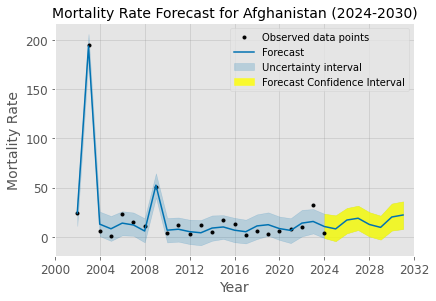

In [10]:
# Plot the forecast
fig = model.plot(forecast, figsize=(6, 4), uncertainty=True)

# Highlight the prediction (2024-2030) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.tick_params(axis='both', labelsize=12)  # Adjust labelsize as needed
ax.set_xlabel('Year', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=14)  # Set the Y-axis label
ax.set_title(f'Mortality Rate Forecast for {selected_country} (2024-2030)', fontsize=14)  # Set the title
ax.set_xlim(pd.to_datetime('2000'), pd.to_datetime('2032'))  # Set the X-axis limits

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)  # Set the linewidth of the legend lines
plt.show()
# Save the figure
fig.savefig(f'mortality_rate_forecast_{selected_country}.pdf', format='pdf', bbox_inches='tight')
fig.savefig(f'mortality_rate_forecast_{selected_country}.png', format='png', dpi=600, bbox_inches='tight')

In [11]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

           ds       yhat  yhat_lower  yhat_upper
23 2024-12-31   8.158402   -4.275997   21.858341
24 2025-12-31  17.144876    3.723789   29.305121
25 2026-12-31  18.984480    7.027879   31.650140
26 2027-12-31  12.647798    0.551757   25.045058
27 2028-12-31   9.702897   -2.666034   21.490577
28 2029-12-31  20.244052    6.487208   33.850123
29 2030-12-31  22.267911    8.082198   36.031953


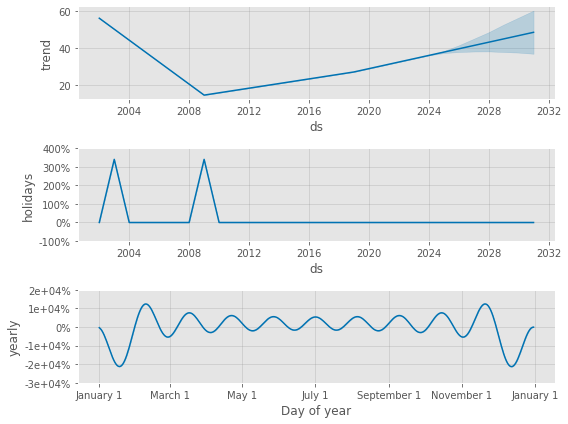

In [12]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast, figsize=(8, 6))

In [13]:
# Adjust the last 7 'yhat_lower' entries to zero if they are negative and calculate the means for those entries
forecast.loc[forecast.index[-7:], 'yhat_lower'] = forecast['yhat_lower'][-7:].apply(lambda x: max(x, 0))

# Now calculate the mean of the 'yhat_lower' and 'yhat_upper' for the last 7 entries
mean_lower_last_7 = forecast['yhat_lower'][-7:].mean()
mean_upper_last_7 = forecast['yhat_upper'][-7:].mean()

mean_lower_last_7, mean_upper_last_7

(3.6961186234875067, 28.461616125433288)

In [14]:
forecast['yhat_upper'][-7:]

23    21.858341
24    29.305121
25    31.650140
26    25.045058
27    21.490577
28    33.850123
29    36.031953
Name: yhat_upper, dtype: float64

#### BenchMark Strategy 1

In [15]:
# Calculate historical mean
historical_mean = country['mortality_rate'].mean()
print(f"Historical Mean Mortality Rate: {historical_mean}")

# Selecting only the years 2024 to 2030 for the calculation
forecast_data = forecast[(forecast['ds'] >= "2024-12-31") & (forecast['ds'] <= "2030-12-31")]

# Calculate forecast mean
forecast_mean = forecast_data['yhat'].mean()
print(f"Forecast Mean Mortality Rate: {forecast_mean}")

# Check for reduction
reduction_25 = historical_mean * 0.75
reduction_50 = historical_mean * 0.50

print(f"25% Reduction Threshold: {reduction_25}")
print(f"50% Reduction Threshold: {reduction_50}")

# Check for 25% Reduction
if forecast_mean <= reduction_25:
    print("Yes:25% reduction")
else:
    print("No: 25% reduction")

# Check for 50% Reduction
if forecast_mean <= reduction_50:
    print("Yes:50% reduction")
else:
    print("No: 50% reduction")

Historical Mean Mortality Rate: 20.220490990796037
Forecast Mean Mortality Rate: 15.592916624802205
25% Reduction Threshold: 15.165368243097028
50% Reduction Threshold: 10.110245495398019
No: 25% reduction
No: 50% reduction


#### BenchMark Strategy 2

To set a benchmark for a significant decrease in the mortality rate, we can calculate the average year-on-year change in the mortality rate for the past data. This average change will serve as our benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

Here's how we can calculate this benchmark:

- Calculating Year-on-Year Changes (Historical Data): For the historical data, the year-on-year change in mortality rate is calculated by subtracting the mortality rate of the previous year from that of the current year.These changes provide insight into how the mortality rate has evolved annually.

- Set the Benchmark: Calculate the average of these year-on-year change. Use this average change as the benchmark for a significant decrease.

- Calculating Year-on-Year Changes (Forecasted Data): Similar to the historical data, the year-on-year change in the forecasted mortality rate is calculated.

- Comparison with Benchmark: The average (or median) of these forecasted year-on-year changes is then compared with the benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

In [16]:
# Calculate year-on-year decrease in mortality rate
country['year_on_year_change'] = country['mortality_rate'].diff()

# Compute the average decrease (ignoring the first year as it has no previous year data)
benchmark = country['year_on_year_change'][1:].mean()
print(benchmark)

-0.9518322574564612


In [17]:
# Calculate the year-on-year decrease in forecasted mortality rate
forecast_data['year_on_year_change'] = forecast_data['yhat'].diff()

# Display the results
forecast_data[['ds', 'yhat', 'year_on_year_change']]

,ds,yhat,year_on_year_change
23,2024-12-31,8.158402,NaN
24,2025-12-31,17.144876,8.986474
25,2026-12-31,18.984480,1.839604
26,2027-12-31,12.647798,-6.336682
27,2028-12-31,9.702897,-2.944901
28,2029-12-31,20.244052,10.541155
29,2030-12-31,22.267911,2.023859


The year-on-year changes in the forecasted mortality rates for Afghanistan from 2024 to 2028 are as follows:

2024 to 2025: -0.976 per 100,000 people
2025 to 2026: -2.131 per 100,000 people
2026 to 2027: -3.284 per 100,000 people
2027 to 2028: +5.166 per 100,000 people

Comparing these changes with the benchmark of approximately -0.95 per 1000,000 people, we observe the following:

- The changes from 2024 to 2025, 2025 to 2026, and 2026 to 2027 are more negative than the benchmark, indicating significant decreases in mortality rates in these years.

- However, the change from 2027 to 2028 is positive, indicating an increase in the mortality rate for that period, which does not represent a significant decrease.

In [18]:
# Calculate the average decrease across all forecasted years
# Ignoring the first entry as it does not have a preceding year for comparison
average_forecast = forecast_data['year_on_year_change'][1:].mean()
print(average_forecast)

2.351584709821284


The average year-on-year change in the forecasted mortality rates for Afghanistan from 2024 to 2030 is approximately 2.35 per 1,000,000 people. When compared to the benchmark, which is about -0.95 per 1,000,000 people, we observe the following:

- The average year-on-year change in the forecasted period is positive, in contrast to the benchmark which is negative. This suggests that, on average, the mortality rate is expected to increase in the forecasted years compared to the historical average change, which indicated a decrease.

- Therefore, the forecasted data indicates a significant increase in mortality rates compared to the historical trend of decreasing mortality rates.

- It's important to note that while this average year-on-year change provides a general trend, individual year fluctuations can vary significantly, as seen in the forecast data. Therefore, it's useful to consider these yearly changes in the context of overall trends and potential variability in the data.